## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [8]:
data = pd.read_csv("QueryResults.csv" ,names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [9]:
data.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [10]:
data.tail()

,DATE,TAG,POSTS
2756,2025-02-01 00:00:00,php,377
2757,2025-02-01 00:00:00,python,2360
2758,2025-02-01 00:00:00,r,519
2759,2025-02-01 00:00:00,ruby,56
2760,2025-02-01 00:00:00,swift,340


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2761 non-null   object
 1   TAG     2761 non-null   object
 2   POSTS   2761 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 64.8+ KB


**Challenge**: Count the number of entries in each column of the dataframe

In [12]:
data.count()

,0
DATE,2761
TAG,2761
POSTS,2761


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [32]:
data.groupby('TAG').sum().sort_values('POSTS', ascending=False)

,DATE,POSTS
TAG,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2531199
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2210884
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919282
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624165
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1467569
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,813325
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,510363
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407423
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,336130


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [34]:
data.groupby('TAG').count().sort_values('POSTS', ascending=False)

,DATE,POSTS
TAG,,
c#,200,200
assembly,199,199
c,199,199
c++,199,199
delphi,199,199
java,199,199
python,199,199
javascript,199,199
perl,199,199


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [38]:
data['DATE'][0]

'2008-07-01 00:00:00'

In [39]:
type(data['DATE'][0])

str

In [40]:
data['DATE']=pd.to_datetime(data['DATE'])

In [43]:
data['DATE'].head()

,DATE
0,2008-07-01
1,2008-08-01
2,2008-08-01
3,2008-08-01
4,2008-08-01


## Data Manipulation



In [45]:
data.shape

(2761, 3)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [46]:
data.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [48]:
data.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [49]:
reshape_data = data.pivot(index="DATE", columns="TAG", values="POSTS")

In [51]:
reshape_data

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1122.0,630.0,129.0,474.0,534.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1145.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,89.0,465.0,1588.0,917.0,84.0,177.0,1506.0,1874.0,21.0,649.0,3471.0,784.0,63.0,458.0
2024-11-01,98.0,401.0,1352.0,845.0,56.0,125.0,1257.0,1635.0,20.0,539.0,3136.0,693.0,75.0,386.0
2024-12-01,90.0,328.0,1088.0,686.0,42.0,114.0,1164.0,1387.0,24.0,428.0,2694.0,549.0,52.0,316.0


In [53]:
reshape_data.count()

,0
TAG,
assembly,199
c,199
c#,200
c++,199
delphi,199
go,184
java,199
javascript,199
perl,199


In [54]:
reshape_data.fillna(0,inplace=True)

In [55]:
reshape_data.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1122.0,630.0,129.0,474.0,534.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1145.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,953.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [56]:
reshape_data.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

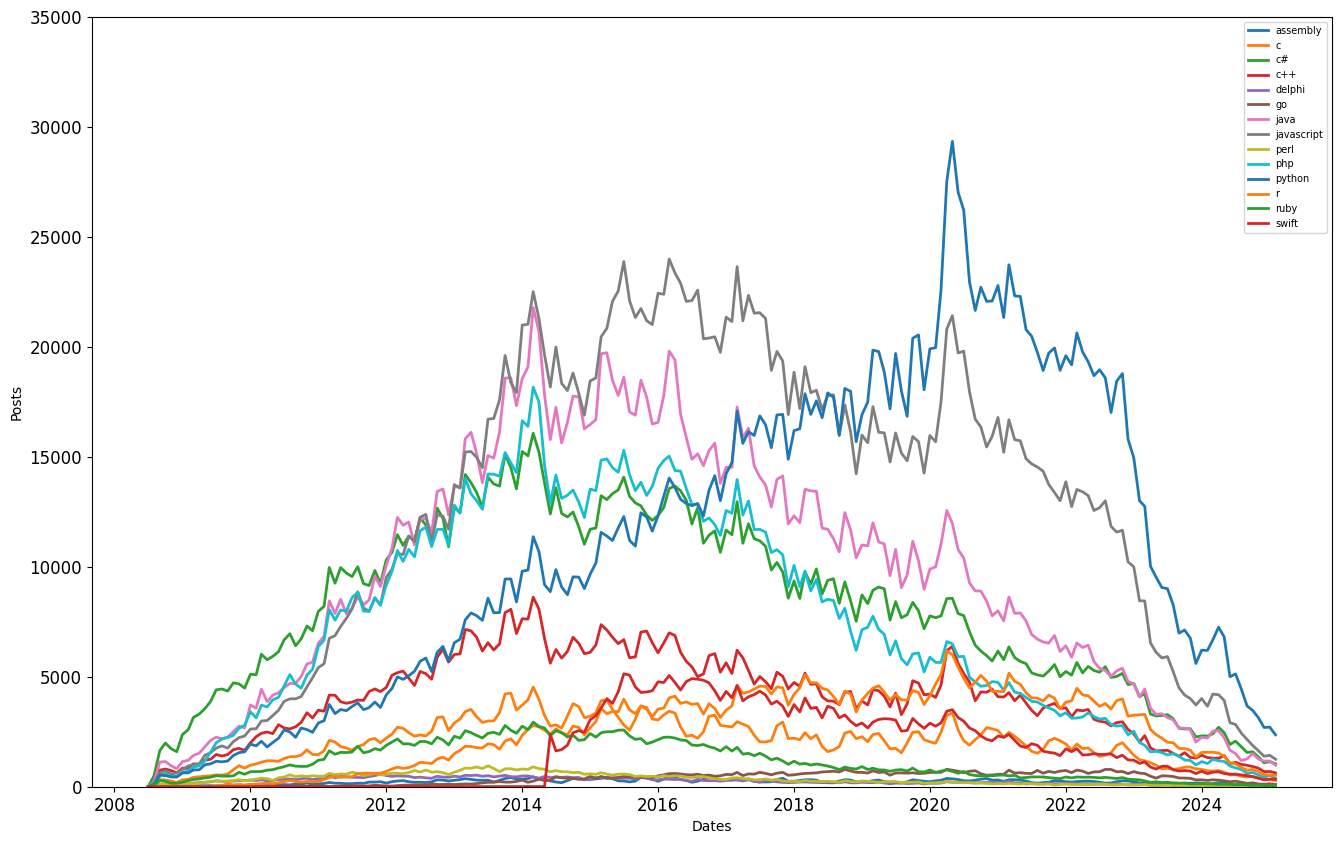

In [84]:
roll_df = reshape_data.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0,35000)
plt.xlabel("Dates")
plt.ylabel("Posts")


for col in reshape_data.columns:
  plt.plot(reshape_data.index,reshape_data[col],linewidth=2, label=reshape_data[col].name)
plt.legend(fontsize=7)
